# Data preprocessing

Notebook that will analye and create graphics to help to analyze data related with water, power, gas, and others...

- Process the data and analyse the consumption of water, power and gas.
- Create graph that show the consumption per month, seasons, years, fiscal years.
- Verify the influence of weather in cosnumption
- Forecast consumption given  specific weather
- Forecast cost given external factors (contract price, gas prive variation, kwh price variation)

In [16]:
# import area
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

In [17]:
# variablez
path = "../data_storage/"
# path to gas data
gas = path + "resampled_data_D_gas.csv"
# path to electricity data
power = path + "resampled_data_D_power.csv"
# path to water data
water = path + "resampled_data_D_water.csv"
# path to power_price_consumption data
power_price = path + "power_price_domestic_belgium.csv"
df_power_price = pd.DataFrame()
# path to raw
raw = path + "raw_data.csv"



In [19]:
# convert csv to dataframe
# df = pd.DataFrame()


def conv_df(file):
    split_file = file.split("/")[-1].split(".")[0]
    # check if the file exists
    if os.path.exists(file):
         # convert the csv to dataframe
        df = pd.read_csv(file, sep=";")
        print(f"{split_file} has been converted to a dataframe")
        # get the file name
        name = split_file
        # create a variable with the name of the file
        globals()["df_" + name] = df
        # return the dataframe
        return df
    else:
        print(f"{split_file} does not exist")
        return None


# convert the csv files to dataframes
conv_df(power_price)

power_price_domestic_belgium does not exist


In [20]:
# process the power_price data
def proc_power_price(df):
    # drop the second column
    df = df.drop(df.columns[1], axis=1)
    # rename the columns
    df.columns = ["date", "price"]
    # convert the date to datetime
    df["date"] = pd.to_datetime(df["date"])
    # replace commas with periods in the price column
    df["price"] = df["price"].str.replace(",", ".")
    # convert the price to float
    df["price"] = df["price"].astype(float)
    # sort the values by date ascending
    df = df.sort_values(by="date", ascending=True)
    # set the date as the index
    df = df.set_index("date")
    # resample to monthly and fill the missing values with the interpolation method
    df = df.resample("ME").mean().interpolate()
    df_power_price = df

    return df_power_price


df_power_price = proc_power_price(conv_df(power_price))

power_price_domestic_belgium does not exist


AttributeError: 'NoneType' object has no attribute 'drop'

In [57]:
# function to convert csv in data_storage (gas.csv, power.csv, water.csv and others) to pd dataframe that will named df_gas, df_power, df_water and others depending on the file name
def csv_to_df(file):
    split_file = file.split("/")[-1].split(".")[0]
    # check if the file exist
    if os.path.exists(file):
        # read the file
        df = pd.read_csv(file)
        # index the file by date_eom
        df["date"] = pd.to_datetime(df["date"])
        # convert date_eom to datetime
        df.set_index("date", inplace=True)
        # keep date_eom and calc_cons columns
        df = df[["calc_cons"]]
        # change the name of calc_cons to the name of the file
        df.rename(columns={"calc_cons": split_file}, inplace=True)
        # get the file name
        name = split_file
        # create a variable with the name of the file
        globals()["df_" + name] = df
        # return the file
        return df
    else:
        # return a message if the file does not exist
        return "The file does not exist"


df_water = csv_to_df(water)
df_gas = csv_to_df(gas)
df_power = csv_to_df(power)
df_raw = pd.read_csv(raw)
# csv_to_df(power_price)

In [58]:
df_raw.head()

,date,days,g_id_meter,gas_m3,g_cons,g_av_day,w_id_meter,water_m3,w_cons,w_av_day,p_id_meter,power_kwh,p_cons,p_av_day
0,01/06/2011,0.0,8.0,1.000,0.000,0.000000,6.0,1.0,0.0,0.000000,7,0.0,0.0,0.000000
1,12/07/2011,41.0,8.0,NaN,NaN,NaN,6.0,10.0,9.0,0.219512,7,NaN,NaN,NaN
2,02/02/2012,205.0,8.0,256.622,255.622,1.039114,6.0,NaN,NaN,NaN,7,NaN,NaN,NaN
3,26/03/2012,53.0,8.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,7,1216.5,1216.5,4.068562
4,12/07/2012,108.0,8.0,NaN,NaN,NaN,6.0,108.0,98.0,0.267760,7,NaN,NaN,NaN


In [59]:
# function to get description, info and head of the dataframe
def get_info(df):
    # get the description of the dataframe
    description = df.describe()
    # get the info of the dataframe
    info = df.info()
    # get the head of the dataframe
    head = df.head()
    # return the description, info and head of the dataframe
    return description, info, head


get_info(df_power)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4780 entries, 2014-09-04 to 2014-10-02
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resampled_data_D_power  4777 non-null   float64
dtypes: float64(1)
memory usage: 74.7 KB


(       resampled_data_D_power
 count             4777.000000
 mean                 2.730793
 std                  0.961622
 min                  0.016000
 25%                  2.040741
 50%                  2.800000
 75%                  3.495082
 max                  4.400000,
 None,
             resampled_data_D_power
 date                              
 2014-09-04                     NaN
 2014-09-05                2.841748
 2014-09-06                2.841748
 2014-09-07                2.841748
 2014-09-08                2.841748)

In [60]:
df_power

,resampled_data_D_power
date,
2014-09-04,NaN
2014-09-05,2.841748
2014-09-06,2.841748
2014-09-07,2.841748
2014-09-08,2.841748
...,...
2014-09-28,3.680000
2014-09-29,3.680000
2014-09-30,3.680000


# Exploratory for water

In [29]:
# function to graph the dataframe
from matplotlib import lines


def graph_df(df):
    # import matplotlib
    import matplotlib.pyplot as plt

    # plot the dataframe with consumption on the main y-axis and habitants onsite rainwater heating on the secondary y-axis
    # df.plot(
    #     secondary_y=["habitants", "onsite", "rainwater", "heating", "cost_unit"] ,
    #     figsize=(30, 15),
    #     label=["Consumption", "Habitants", "Onsite", "Rainwater", "Heating", "Cost Unit"],
    #     title="Consumption" + " " + df.columns[0] ,
    #     xlabel="Date",
    #     ylabel="Consumption",
    # )
    # # show the plot
    # plt.show()
    # plt.savefig(f"../graphs/{df.columns[0]}.png")
    # plt.savefig(f"../graphs/{df.columns[0]}.svg")
    # save the plot and the grahic as a png and svg file
    df.plot(
        secondary_y=["habitants", "onsite", "rainwater", "heating", "cost_unit"],
        figsize=(10, 5),
        label=["Consumption", "Habitants", "Onsite", "Rainwater", "Heating", "Cost Unit"],
        title="Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
    )
    plt.savefig(f"../graphs/{df.columns[0]}.png")
    plt.savefig(f"../graphs/{df.columns[0]}.svg")
    plt.savefig(f"../graphs/{df.columns[0]}.pdf")

# graph_df(df_power)
df_raw

,date,days,g_id_meter,gas_m3,g_cons,g_av_day,w_id_meter,water_m3,w_cons,w_av_day,p_id_meter,power_kwh,p_cons,p_av_day
0,01/06/2011,0.0,8.0,1.000,0.000,0.000000,6.0,1.000,0.000,0.000000,7,0.0,0.0,0.000000
1,12/07/2011,41.0,8.0,NaN,NaN,NaN,6.0,10.000,9.000,0.219512,7,NaN,NaN,NaN
2,02/02/2012,205.0,8.0,256.622,255.622,1.039114,6.0,NaN,NaN,NaN,7,NaN,NaN,NaN
3,26/03/2012,53.0,8.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,7,1216.5,1216.5,4.068562
4,12/07/2012,108.0,8.0,NaN,NaN,NaN,6.0,108.000,98.000,0.267760,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3/2/2024,33.0,1.0,47856.587,223.395,6.769545,3.0,389.949,9.039,0.273909,5,3366.1,143.5,4.348485
141,2/3/2024,28.0,1.0,47984.123,127.536,4.554857,3.0,397.351,7.402,0.264357,5,3468.6,102.5,3.660714
142,7/4/2024,36.0,1.0,48070.731,86.608,2.405778,3.0,407.061,9.710,0.269722,5,3591.9,123.3,3.425000
143,1/5/2024,24.0,1.0,48123.042,52.311,2.179625,3.0,413.556,6.495,0.270625,5,3683.2,91.3,3.804167


In [30]:
# parse a svg file
def parse_svg(file):
    # open the file
    with open(file, "r") as f:
        # read the file
        data = f.read()
        # return the data
        return data
    
# parse the svg file
parse_svg("../graphs/resampled_data_D_power.svg")

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="720pt" height="360pt" viewBox="0 0 720 360" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2024-06-28T09:30:04.151372</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.9.0, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 36

In [31]:
# use the data_exploration_transformation\resampled_data_D_gas.svg file to create a function that will graph the data
def graph_svg(file):
    # check if the file exists
    if os.path.exists(file):
        # read the file
        with open(file, "r") as f:
            # read the file
            file = f.read()
            # show the file
            print(file)
    else:
        # return a message if the file does not exist
        return "The file does not exist"

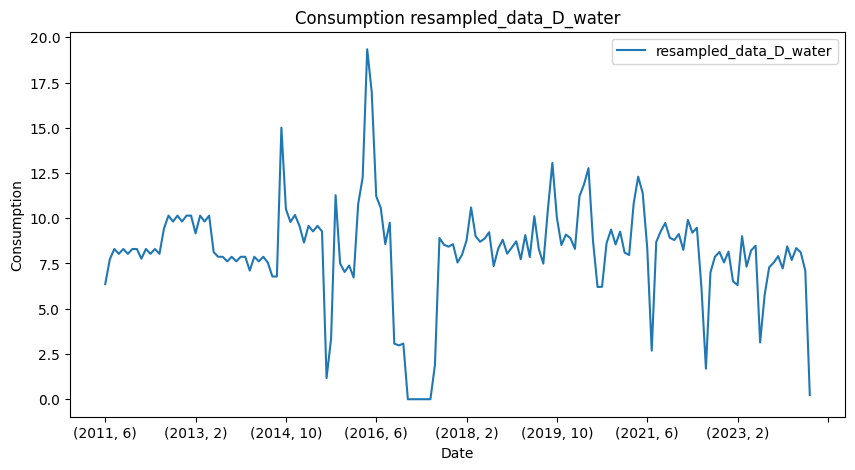

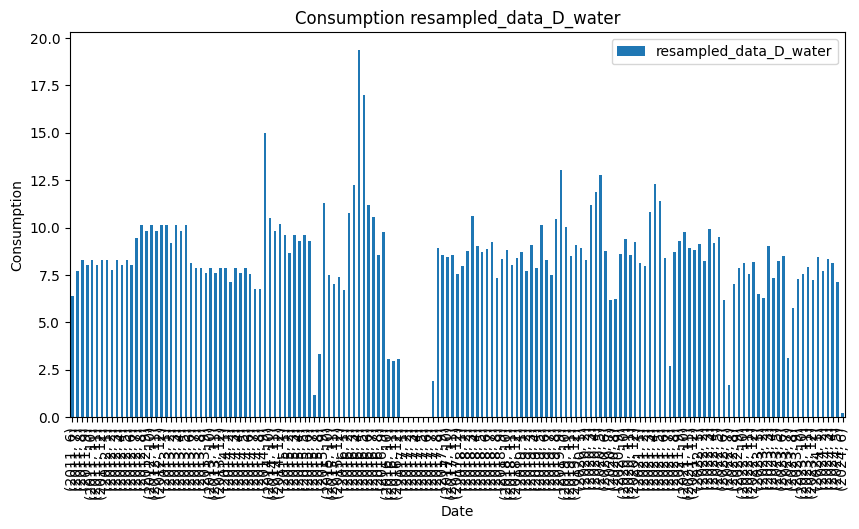

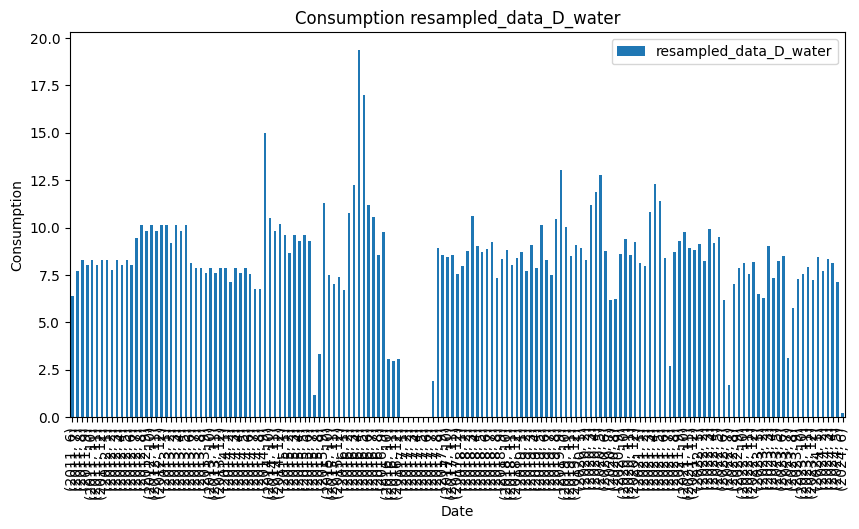

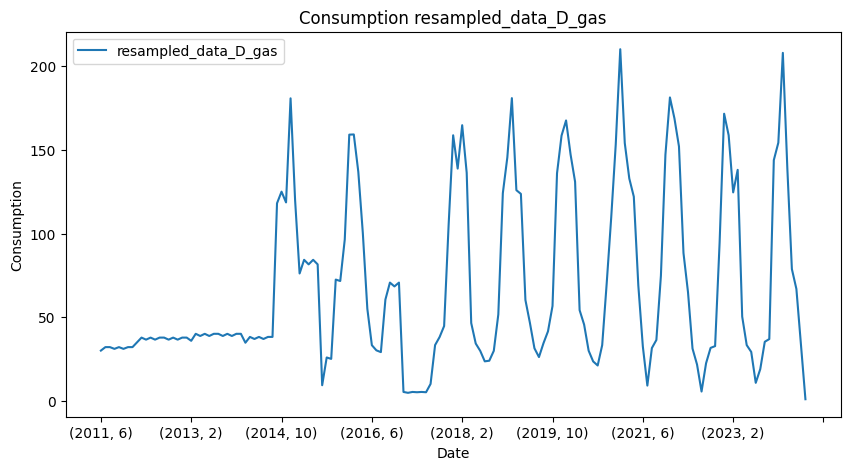

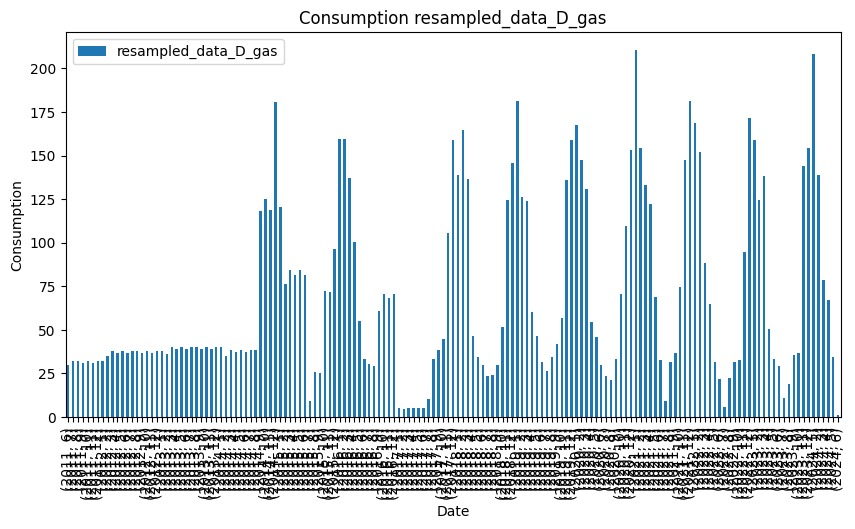

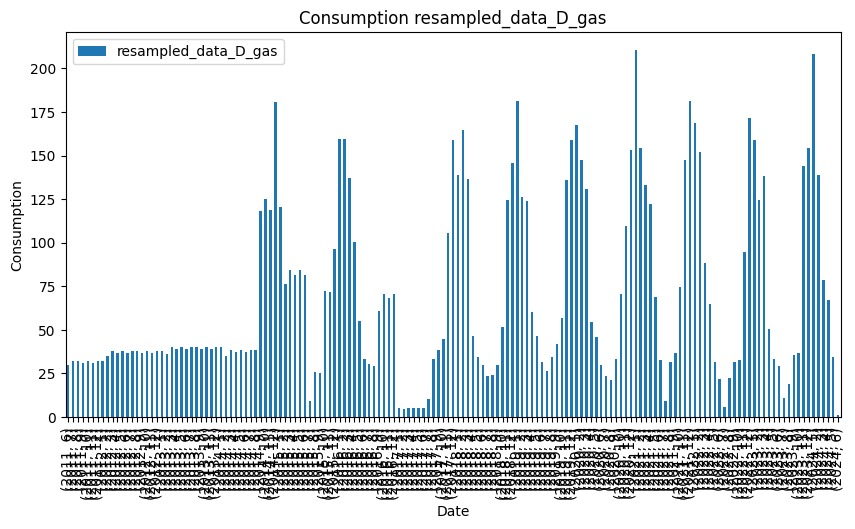

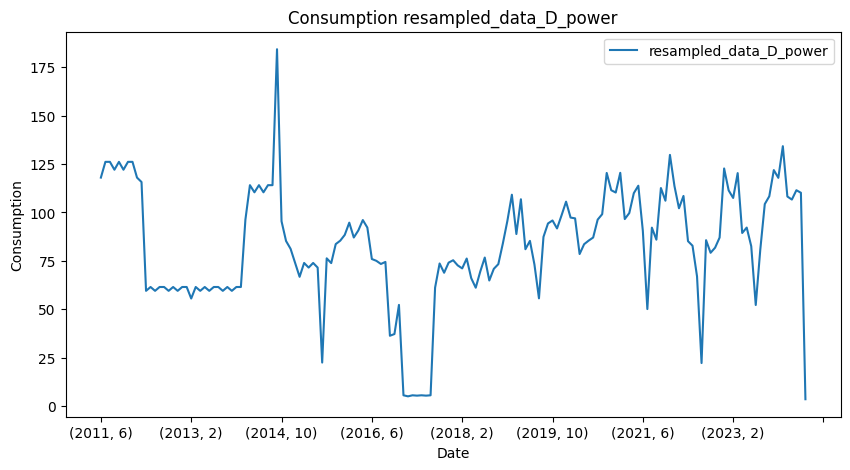

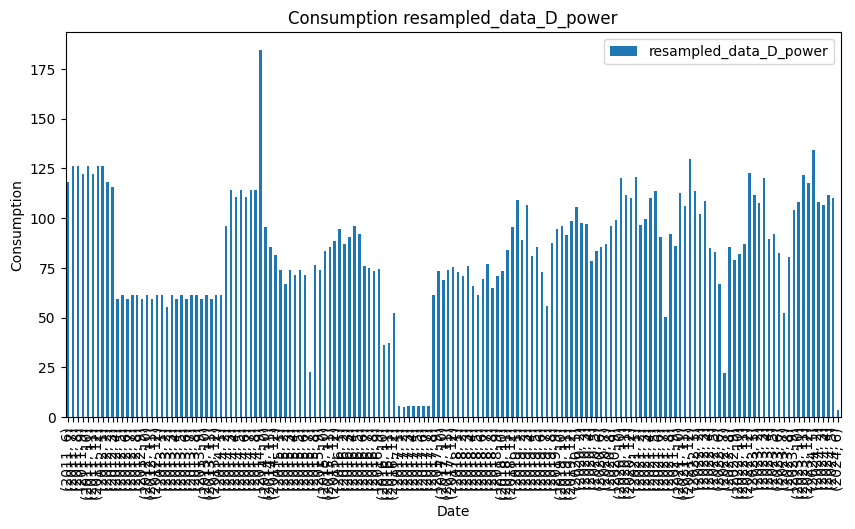

resampled_data_D_power
date date                        
2011 6                 117.988294
     7                 126.125418
     8                 126.125418
     9                 122.056856
     10                126.125418
...                           ...
2024 2                 108.224026
     3                 106.646429
     4                 111.470833
     5                 110.159005
     6                   3.545161

[157 rows x 1 columns]

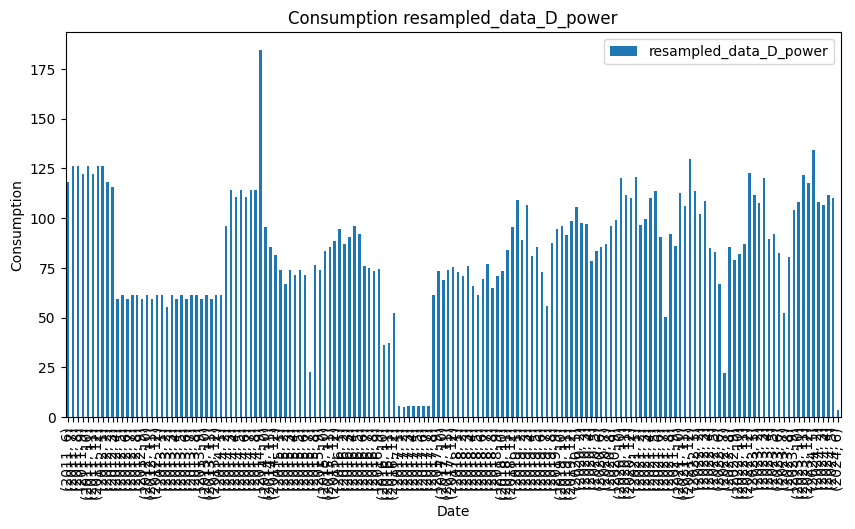

In [34]:
# function to group by year and month and graph the dataframe
def group_by(df):

    # sort the index
    df = df.sort_index()

    # group by year and month
    df = df.groupby([df.index.year, df.index.month]).sum()
    # plot the dataframe
    df.plot(
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
        figsize=(10, 5),
    )
    df.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 5),
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
    )

    # show the plot
    plt.show()
    # save the graph as a svg file
    df.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 5),
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
    ).get_figure().savefig(f"../graphs/{df.columns[0]}.svg")
    # return the dataframe
    return df
    
    


group_by(df_water)
group_by(df_gas)
group_by(df_power)

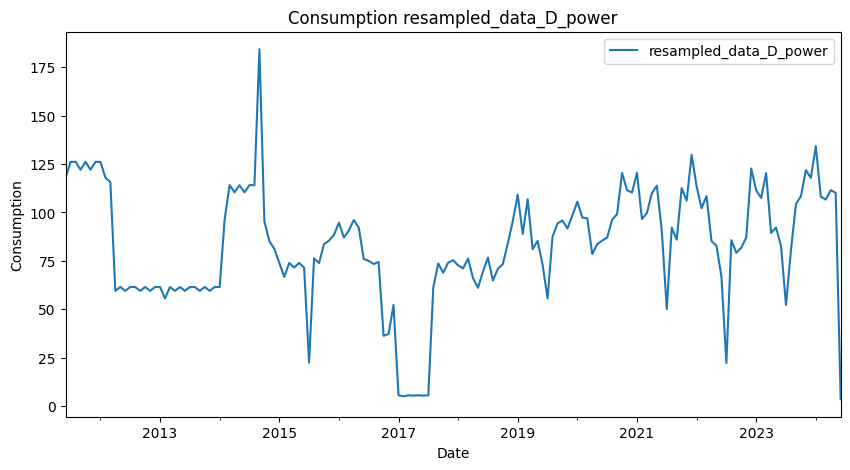

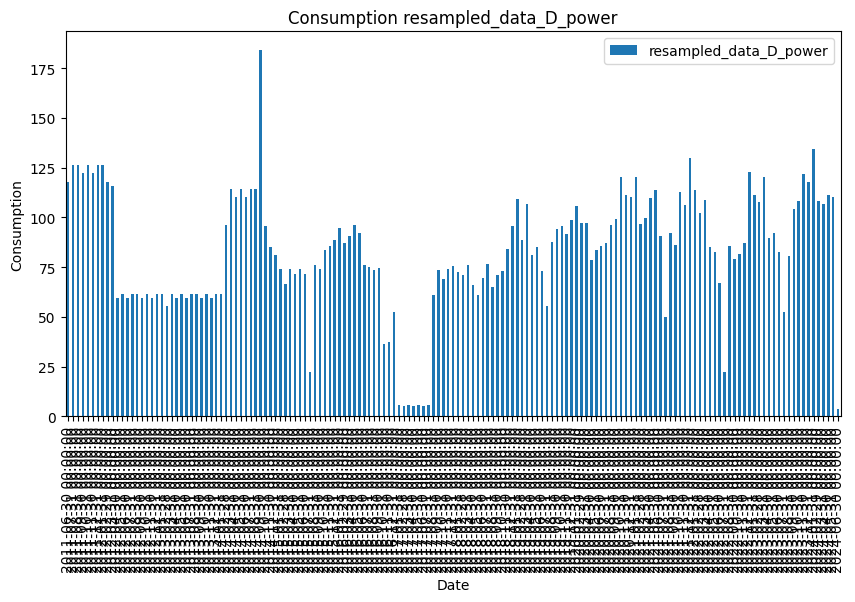

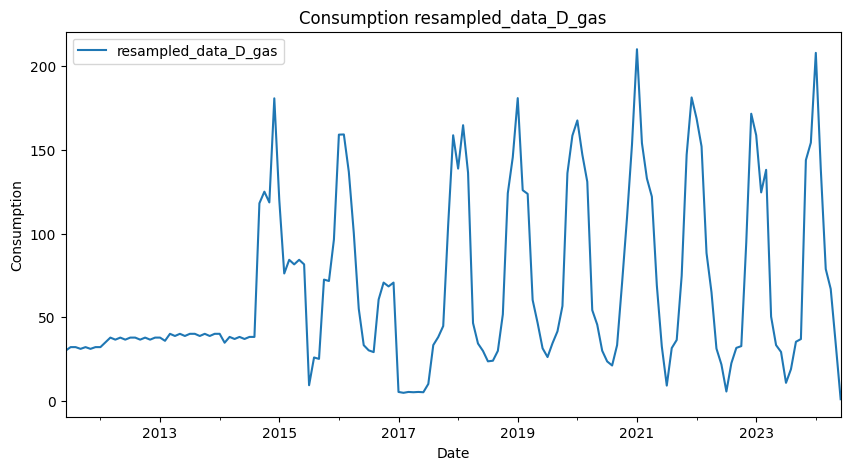

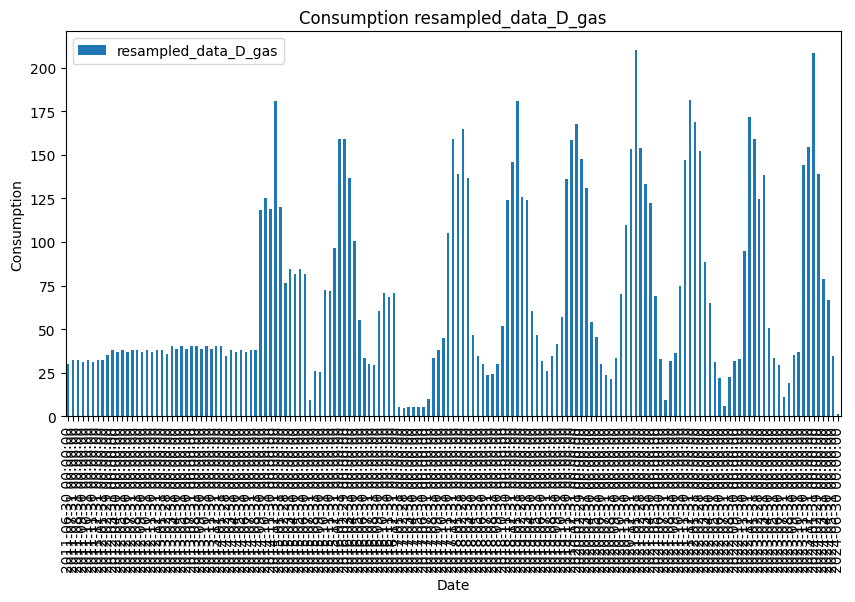

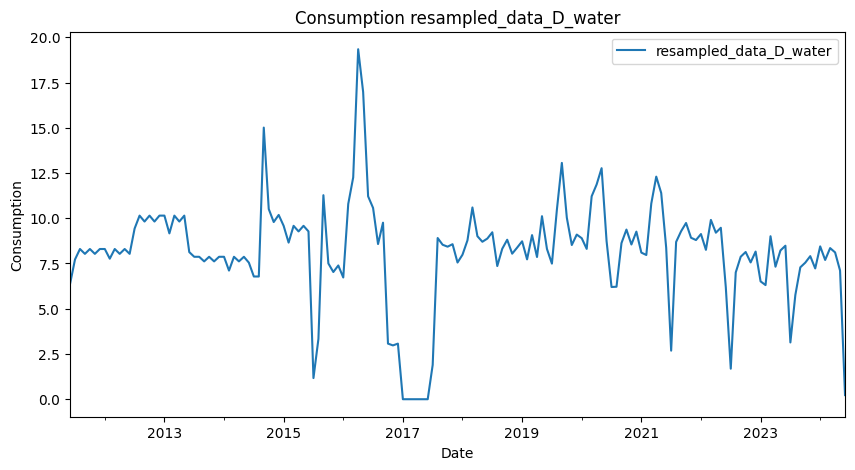

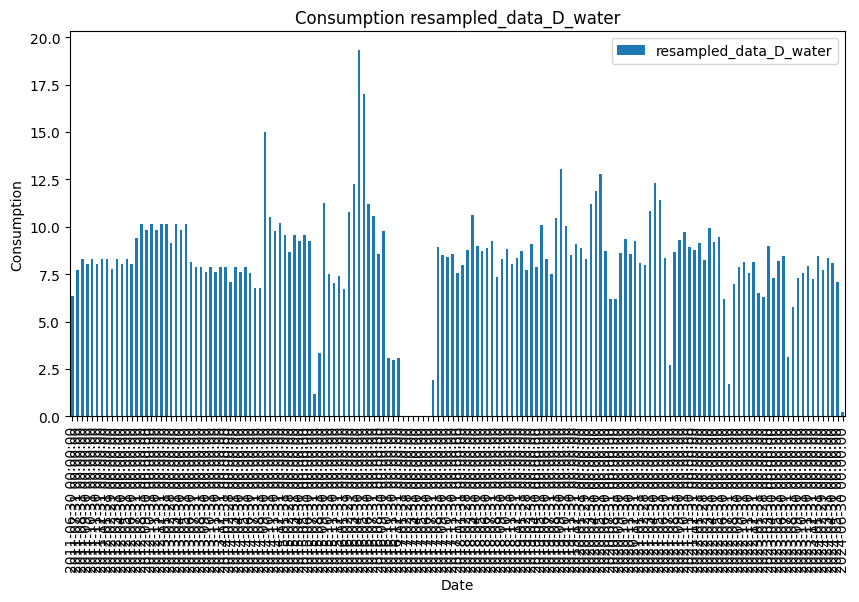

In [9]:
# function to group by EOM
def group_by_eom(df):
    # group by EOM
    df = df.resample("ME").sum()
    # plot the dataframe
    df.plot(
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
        figsize=(10, 5),
    )
    df.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 5),
        title=f"Consumption" + " " + df.columns[0],
        xlabel="Date",
        ylabel="Consumption",
    )
    # show the plot
    plt.show()
    return df

df_power = group_by_eom(df_power)
df_gas = group_by_eom(df_gas)
df_water = group_by_eom(df_water)


In [62]:
df_power.head()

,resampled_data_D_power
date,
2014-09-04,NaN
2014-09-05,2.841748
2014-09-06,2.841748
2014-09-07,2.841748
2014-09-08,2.841748


In [63]:
# Add a column habitants
def add_habitants(df):
    df = df.copy()
    df = df.resample("D").sum()
        
    # create a column with 0
    df["habitants"] = 0
    # fill the column with the values
    df.loc[:"2011-07-15", "habitants"] = 2
    df.loc["2011-07-15":"2013-11-30", "habitants"] = 3
    df.loc["2013-12-01":"2016-09-01", "habitants"] = 4
    df.loc["2013-12-01":"2016-09-01", "habitants"] = 4
    df.loc["2016-10-02":"2017-02-02", "habitants"] = 2
    df.loc["2017-08-01":"2023-05-06", "habitants"] = 4
    df.loc["2023-05-07":"2023-08-10", "habitants"] = 1
    df.loc["2023-08-11":, "habitants"] = 4

    # return the dataframe
    return df


df_power = add_habitants(df_power)
df_gas = add_habitants(df_gas)
df_water = add_habitants(df_water)
# df_raw = add_habitants(df_raw)

In [64]:
# add a column on-site, 1 is on site, 0 is off site (off site dates: 2015-02-20 to 2015-03-08, 2016-09-15 to 2017-08-10, 2014-03-10 to 2014-04-11,2016-08-28 to 2016-08-25, 2013-03-26 to 2013-03-30)
def add_onsite(df):
    # create a column with 0
    df["onsite"] = 1
    # fill the column with the values
    df.loc["2015-02-20":"2015-03-08", "onsite"] = 0
    df.loc["2016-09-15":"2017-08-10", "onsite"] = 0
    df.loc["2014-03-10":"2014-04-11", "onsite"] = 0
    df.loc["2016-08-28":"2016-08-25", "onsite"] = 0
    df.loc["2013-03-26":"2013-03-30", "onsite"] = 0
    
    # return the dataframe
    return df


df_power = add_onsite(df_power)
df_gas = add_onsite(df_gas)
df_water = add_onsite(df_water)

In [65]:
# function add column with rain_water usage, 1 is rain water, 0 is not rain water (rain water dates: since 2014-09-03)
def add_rain_water(df):
    # create a column with 0
    df["rain_water"] = 0
    # fill the column with the values
    df.loc["2014-09-03":, "rain_water"] = 1
    # return the dataframe
    return df


df_power = add_rain_water(df_power)
df_gas = add_rain_water(df_gas)
df_water = add_rain_water(df_water)

In [66]:
# function to heating on, 1 is heating on, 0 is heating off (heating on dates: winter months)
def add_heating(df):
    # create a column with 0
    df["heating"] = 0
    # fill the column with the values
    df.loc[df.index.month.isin([1, 2, 3, 10, 11, 12]), "heating"] = 1
    # return the dataframe
    return df


df_power = add_heating(df_power)
df_gas = add_heating(df_gas)
df_water = add_heating(df_water)


In [72]:
# add column with cost_unit if gas = 0.05, power = 0.15, water = 0.01
def add_cost_unit(df):
    # create a column with 0
    df["cost_unit"] = 0
    # fill the column with the values
    if "water" in df.columns:
        df["cost_unit"] = 0.01
    elif "gas" in df.columns:
        df["cost_unit"] = 0.05
    # add the power_price from df_power_price to df by the date
    elif "power" in df.columns:
        # unify the index of the two dataframes
        df_power_price.index = df_power_price.index.tz_localize(None)
        df.index = df.index.tz_localize(None)
        # add the power_price to the df by the date if not date, fill with the last value
        df["cost_unit"] = df_power_price["price"]
        df["cost_unit"] = df["cost_unit"].fillna(method="ffill")
    # save the dataframe as a csv file
    df.to_csv(f"../data_storage/{df.columns[0]}_EDA.csv")

        # return the dataframe
    return df


df_power = add_cost_unit(df_power)
df_gas = add_cost_unit(df_gas)
df_water = add_cost_unit(df_water)

In [71]:
df_power.head()

,resampled_data_D_power,habitants,onsite,rain_water,heating,cost_unit
date,,,,,,
2011-06-01,0.000000,2,1,0,0,0
2011-06-02,4.068562,2,1,0,0,0
2011-06-03,4.068562,2,1,0,0,0
2011-06-04,4.068562,2,1,0,0,0
2011-06-05,4.068562,2,1,0,0,0


# EDA

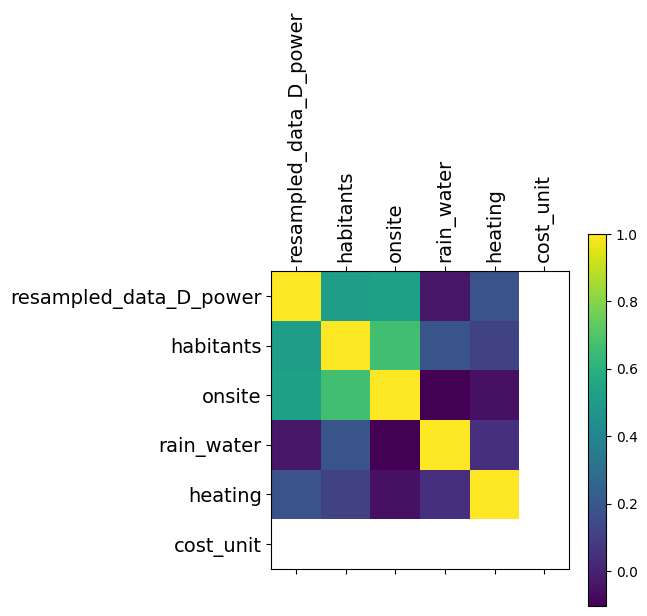

,resampled_data_D_power,habitants,onsite,rain_water,heating,cost_unit
resampled_data_D_power,1.000000,0.515193,0.526631,-0.033922,0.180263,NaN
habitants,0.515193,1.000000,0.664329,0.184640,0.109683,NaN
onsite,0.526631,0.664329,1.000000,-0.104058,-0.052309,NaN
rain_water,-0.033922,0.184640,-0.104058,1.000000,0.045424,NaN
heating,0.180263,0.109683,-0.052309,0.045424,1.000000,NaN
cost_unit,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Correlation between the columns
def corr(df):
    # get the correlation between the columns
    correlation = df.corr()
    # plot the correlation
    plt.matshow(correlation)
    plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=90)
    plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)
    plt.colorbar()
    plt.show()
    # return the correlation
    return correlation

corr(df_power)


# SQL DB